<a href="https://colab.research.google.com/github/kislay960/Diabetes-Prediction/blob/master/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabete Prediction

Machine Learning Logistic Regression and Random Forest  model to predict whether a person is diabetic or not.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark==2.4.4

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
     |████████████████████████████████| 215.7MB 5.9MB/s eta 0:00:015   |████▋                           | 31.2MB 8.7MB/s eta 0:00:22     |█████▌                          | 37.4MB 10.4MB/s eta 0:00:18     |████████▉                       | 59.7MB 11.7MB/s eta 0:00:14     |████████████████▊               | 112.8MB 11.9MB/s eta 0:00:09     |████████████████████████████▋   | 193.2MB 4.7MB/s eta 0:00:05     |█████████████████████████████▊  | 200.6MB 430kB/s eta 0:00:36     |█████████████████████████████▉  | 201.3MB 430kB/s eta 0:00:34
     |████████████████████████████████| 204kB 5.3MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=5402608792d81c466f19f1dc7d7e4ca1f144d74dc4f43ea2acef94917275901a
  Stored in directory: /home/aims/.cache/pip/wheels/ab/09/4d/0

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('diabetes.csv')

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [19]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [21]:
df.shape

(2000, 9)

In [31]:
#length of columns
len(df.columns)

9

In [22]:
#names of columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df.count()

Pregnancies                 2000
Glucose                     2000
BloodPressure               2000
SkinThickness               2000
Insulin                     2000
BMI                         2000
DiabetesPedigreeFunction    2000
Age                         2000
Outcome                     2000
dtype: int64

In [33]:
#groupby outco
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,1316,1316,1316,1316,1316,1316,1316,1316
1,684,684,684,684,684,684,684,684


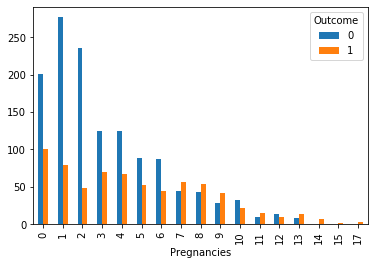

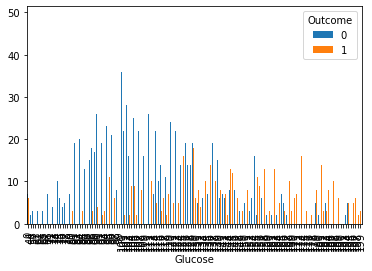

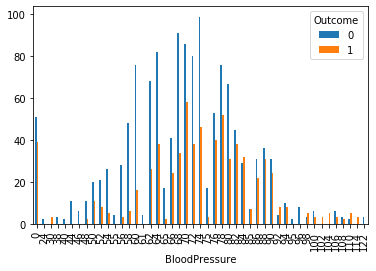

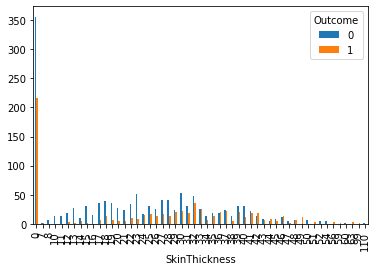

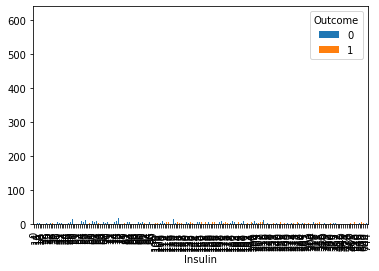

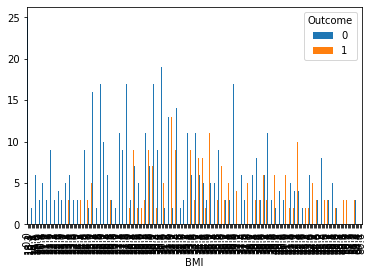

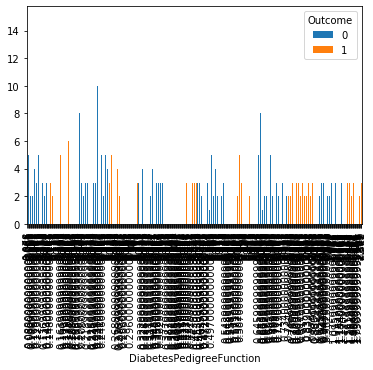

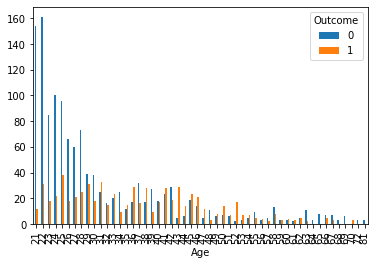

In [36]:
for col in df.columns[:-1]:
    pd.crosstab(df[col], df.Outcome).plot(kind='bar')
    plt.xlabel(col)

In [35]:
#statistics of our data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [42]:
#check for null values

print(col+":",df[df[col].isnull()].count())

Outcome: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [57]:
def count_zeros():
  column_list=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
  for i in column_list:
    print(i+":",df[df[i]==0].count())

In [59]:
# count_zeros()

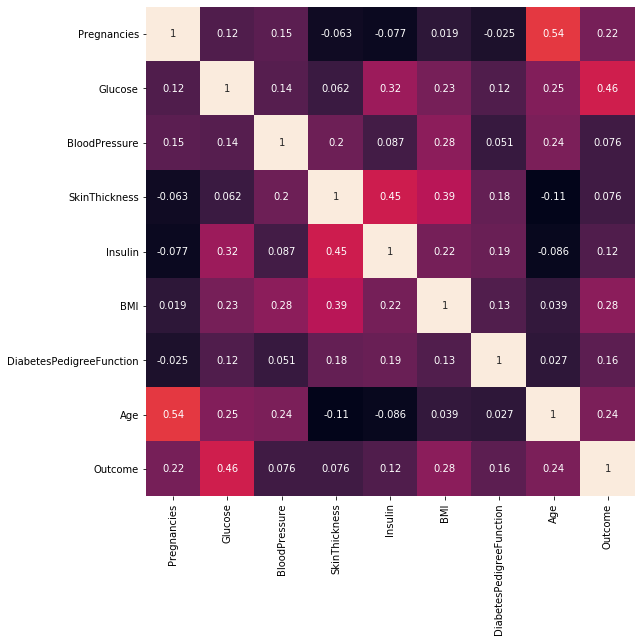

In [62]:
#  we can see that here no height correlation
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), square=True, annot=True, cbar=False,  ax=ax);


## Import packages from sklearn

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [64]:
Features = df.drop(['Outcome'], axis=1)
Features.shape

(2000, 8)

In [66]:
Target = df['Outcome']
Target.shape

(2000,)

In [67]:
## split data
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.3, random_state=1)

In [68]:
X_train.shape

(1400, 8)

In [94]:

models = LogisticRegression(random_state=0)
model = models.fit(X_train, y_train)

/home/aims/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
Y2_prob=model.predict_proba(X_test)#[:,1]

In [96]:
Y2_prob

array([[0.65549244, 0.34450756],
       [0.24099999, 0.75900001],
       [0.86152046, 0.13847954],
       ...,
       [0.87872915, 0.12127085],
       [0.69820706, 0.30179294],
       [0.96494777, 0.03505223]])

In [97]:
predictions =models.predict(X_test)

In [99]:
predictions;

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7783333333333333

## Using Random forest classifier 

In [109]:

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

In [110]:
accuracy_score(y_test, pred)

0.7483333333333333

We can see that Logistic regression perfom better than Random forest. We can use other classifiers such as svm, XGBoost to compare the performance.

## Thank you!